# **Holiday Package Prediction:-**
## **1. Problem Statement**  
**Tips & Travel.Com** company wants to enable and establish a viable bussiness model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering Basic, Standard, Delux , Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

## **2. Data Collection**
The Dataset is collected **from http://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction**. The data consists of 20 columns and 4888 rows.

In [2]:
## importing important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\vikas\OneDrive\Desktop\Machine Learning\8 Random Forest\Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# **Data cleaning**
1. Handling missing values
2. Removing duplicates
3. Check Data type
4. Understand the data

In [5]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
## Check all the categories
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [8]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')

In [9]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [10]:
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [11]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [7]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

**Checking Missing Values**

In [13]:
# These are the features with nan value
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]

for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [14]:
#features_with_na = []
#for feature in df.columns:
#    if df[feature].isnull().sum() >= 1:
#        features_with_na.append(feature)

#for feature in features_with_na:
#    missing_percentage = np.round(df[feature].isnull().mean() * 100, 5)
#    print(f"{feature}: {missing_percentage} % missing values")
#

In [15]:
# Statistics on numeriacal columns (Null Columns)
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


# **Imputing Null Values**
1. Impute Median value for Age column
2. Impute Mode for Type of COntract 
3. Impute Median for Duration of Pitch 
4. Impute Mode for NumberofFollow up as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTips
7. Impute Mode for NumberofChildrenVisiting
8. Impute Median for MonthlyIncome

In [16]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [19]:
# Age
df.Age.fillna(df.Age.median(), inplace=True)

# TypeofContact
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

# DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

# NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)

# PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

# NumberOfTIps
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

# NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

# MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [20]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [21]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [22]:
df.drop('CustomerID',inplace=True,axis=1)

In [23]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# **Feature Engineering**
## 1. Feature Extraction

In [24]:
# Create new column for feature 
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns = ['NumberOfPersonVisiting','NumberOfChildrenVisiting'],inplace=True,axis=1)

In [25]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [26]:
# Get all the numeric features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Number of Numerical features : ", len(num_features))

Number of Numerical features :  12


In [29]:
# Get all the Categorical Features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Number of Categorical features : ", len(cat_features))

Number of Categorical features :  6


In [30]:
## Get all the Discrete Features
discrete_features = [feature for feature in num_features if len(df[feature].unique())<=25]
print("Number of Discrete Features : ", len(discrete_features))

Number of Discrete Features :  9


In [31]:
## Get all the Continuous Features
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print("Number of Continuous Features : ", len(continuous_features))

Number of Continuous Features :  3


## 2. Train Test split and Model Training

In [32]:
X = df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

In [33]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
X_train.shape,X_test.shape

((3910, 17), (978, 17))

**Create Column Transformer with 3 types of transformers**

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [38]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncode", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [39]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncode', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [40]:
# Applying Transformation in training(fit_transform)
X_train = preprocessor.fit_transform(X_train)

In [41]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [42]:
# Apply transformation on test(transform)
X_test = preprocessor.transform(X_test)

# **Random Forest Classifier Training**

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

In [ ]:
models = {
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Logistic Regression":LogisticRegression()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # Train Model
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)
    
    # Testing set performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print("Model performance for training set")
    print(" - Accuracy : {:.4f}".format(model_train_accuracy))
    print(" - F1 Score: {:.4f}".format(model_train_f1))
    print(" - Precision: {:.4f}".format(model_train_precision))
    print(" -Recall: {:.4f}".format(model_train_recall))
    print(" - ROC AUC Score: {:.4f}".format(model_train_rocauc_score))
    
    print('----------------------------------------------------------------')

    print("Model performance for testing set")
    print(" - Accuracy : {:.4f}".format(model_test_accuracy))
    print(" - F1 Score: {:.4f}".format(model_test_f1))
    print(" - Precision: {:.4f}".format(model_test_precision))
    print(" -Recall: {:.4f}".format(model_test_recall))
    print(" - ROC AUC Score: {:.4f}".format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')
    
    

Decision Tree
Model performance for training set
 - Accuracy : 1.0000
 - F1 Score: 1.0000
 - Precision: 1.0000
 -Recall: 1.0000
 - ROC AUC Score: 1.0000
----------------------------------------------------------------
Model performance for testing set
 - Accuracy : 0.9223
 - F1 Score: 0.9218
 - Precision: 0.8108
 -Recall: 0.7853
 - ROC AUC Score: 0.8704


Random Forest
Model performance for training set
 - Accuracy : 1.0000
 - F1 Score: 1.0000
 - Precision: 1.0000
 -Recall: 1.0000
 - ROC AUC Score: 1.0000
----------------------------------------------------------------
Model performance for testing set
 - Accuracy : 0.9366
 - F1 Score: 0.9322
 - Precision: 0.9778
 -Recall: 0.6911
 - ROC AUC Score: 0.8436


Logistic Regression
Model performance for training set
 - Accuracy : 0.8460
 - F1 Score: 0.8202
 - Precision: 0.7016
 -Recall: 0.3032
 - ROC AUC Score: 0.6368
----------------------------------------------------------------
Model performance for testing set
 - Accuracy : 0.8364
 - F1

# **Hyperparameter Training**

In [56]:
rf_params = {
 "max_depth":[5,8,15,None,10],
 "max_features":[5,7,"auto",8],
 "min_samples_split":[2,8,15,20],
 "n_estimators":[100,200,500,1000]
}

In [57]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [58]:
# Model List For Hyperparameter Tunning
randomcv_models = [
    ("RF", RandomForestClassifier(),rf_params)
]

In [59]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [60]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    
    random.fit(X_train,y_train)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f"------------------------Best Param For {model_name}------------------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
------------------------Best Param For RF------------------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [61]:
models = {
    "Random Forest":RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=8,max_depth=None)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # Train Model
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)
    
    # Testing set performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print("Model performance for training set")
    print(" - Accuracy : {:.4f}".format(model_train_accuracy))
    print(" - F1 Score: {:.4f}".format(model_train_f1))
    print(" - Precision: {:.4f}".format(model_train_precision))
    print(" -Recall: {:.4f}".format(model_train_recall))
    print(" - ROC AUC Score: {:.4f}".format(model_train_rocauc_score))
    
    print('----------------------------------------------------------------')

    print("Model performance for testing set")
    print(" - Accuracy : {:.4f}".format(model_test_accuracy))
    print(" - F1 Score: {:.4f}".format(model_test_f1))
    print(" - Precision: {:.4f}".format(model_test_precision))
    print(" -Recall: {:.4f}".format(model_test_recall))
    print(" - ROC AUC Score: {:.4f}".format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')


Random Forest
Model performance for training set
 - Accuracy : 1.0000
 - F1 Score: 1.0000
 - Precision: 1.0000
 -Recall: 1.0000
 - ROC AUC Score: 1.0000
----------------------------------------------------------------
Model performance for testing set
 - Accuracy : 0.9325
 - F1 Score: 0.9279
 - Precision: 0.9630
 -Recall: 0.6806
 - ROC AUC Score: 0.8371




In [ ]:
# Plot ROC-AUC Curve
#from sklearn.metrics import roc_auc_score,roc_curve
#plt.figure()

# Add the models to the list that you want to view on the ROC plot
#auc_models = [
#    {
#        'label':'Random Forest Classifier',
#        'model':RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=8,max_depth=None)
#        'auc' : 0.8371
#    },
#    
#]
# Create loop through all model
#for algo in auc_models:
#    model = algo['model'] # Select the model
#    model.fit(X_train,y_train) # Train the model
# Compute False positive rate and True positive rate
#    fpr, tpr, threshoulds = roc_curve(y_test,model.predict_proba(X_test))
# Calculate Area under the curve to Display on the plot


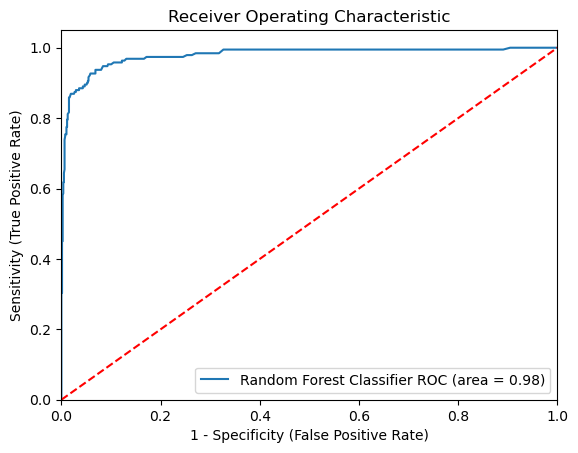

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Add the models to the list that you want to view on the ROC plot
auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features=8, max_depth=None),
        'auc': 0.8371
    },
]

# Create a plot figure
plt.figure()

# Loop through all models
for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)

    # Compute False Positive Rate (FPR) and True Positive Rate (TPR)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    # Calculate AUC
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Plot the ROC curve with AUC in the label
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], auc))

# Plot settings
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Save the plot as a file and show it
plt.savefig("auc.png")
plt.show()


In [64]:
print("The End")

The End
